# <center>Home Assignment 2</center>  
<center>Zhengxuan Yan</center>
<center>zy2053@nyu.edu</center>

## Problem 1  
Draw graphs of AR(1) process $y_k=0.75y_{k-1}+e_k$ for  
Assume that $e_k$ is uniformly distributed on the interval $[-0.5, 0.5]$.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ar_1(y0, n)->list:
    """ AR(1) Process """
    y = [y0]
    e = np.random.uniform(-0.5, 0.5, n)
    for i in range(1, n):
        y.append(0.75 * y[i - 1] + e[i])
    return y

a) $y_0=1$

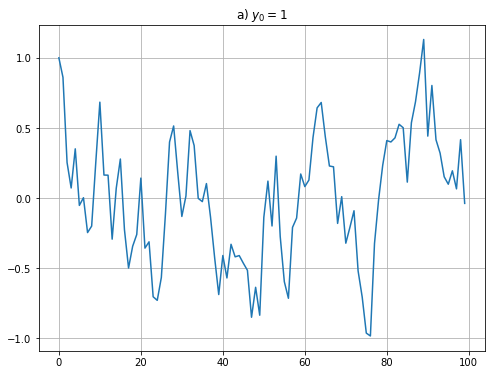

In [3]:
plt.figure(figsize=(8, 6))
plt.title('a) $y_0=1$')
plt.plot(ar_1(1, 100))
plt.grid()
plt.show()

b) $y_0=10$

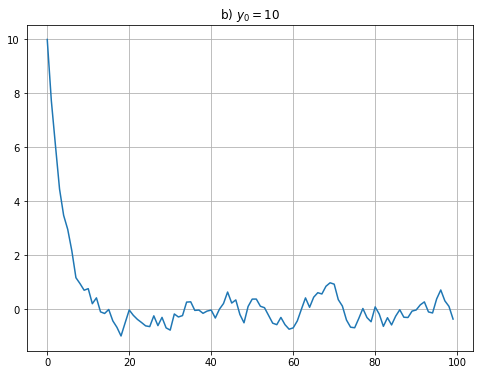

In [4]:
plt.figure(figsize=(8, 6))
plt.title('b) $y_0=10$')
plt.plot(ar_1(10, 100))
plt.grid()
plt.show()

Describe qualitative difference between the graphs a) and b)

For graph a), since $y_0 = 1$, it starts from 1. and after iterations, the memory of the history decrease, and y is dominated by the error term which has a uniform distrition [-0.5, 0.5]. In summary, it fluctuates around -0.5 to 0.5;  
For graph b), since $y_0 = 10$, it starts from 10. The coefficient for the memory is 0.75. Though it starts from 10, after nearly 10 iterations, the memory of history becomes trivial, and then dominated by uniformly distributed error term, fluctuates around -0.5 and 0.5.

## Problem 2

Derive the autocorrelation coefficients $\rho(k)$ for AR(2) (provide all details!) and draw their values (up to $k=10$)

For AR(2) Process we have model, It has $i.i.d$ white noise where $\mathbb{E}[\epsilon_t] = 0$, $\mathbb{E}[\epsilon_t^2] = \sigma_{\epsilon}^2$, $\mathbb{E}[\epsilon_t\epsilon_s] = 0$, if  $t\not=s$    

<center>$AR(2):y_t=a_1y_{t-1}+a_2y_{t-2}+\epsilon_t$ $(1)$</center>  

If the process is stationary, we can write the covariance as a function of increment alone, so let the covariance function $\gamma(k)≐E[y_{t}y_{t+k}]$. We can find the variance $\gamma(0)$ by squaring and taking the expectation of both sides of equation $(1)$ with the following result

<center>$\gamma(0) = cov[y_t,y_{t}] = a_{1}^2\gamma(0) + a_{2}^2\gamma(0) + 2a_{1}a_{2}\gamma(1) + \sigma_{\epsilon}^2$  $(2)$</center>

<center>$\gamma(k) = cov[y_t,y_{t-k}] = a_{1}\gamma(k - 1) + a_{2}\gamma(k - 2) $ if $k\geq1$  $(3)$</center>

Due to the symmetry property of the autocorrelation function. That is, $\gamma_{t}=\gamma_{−t}$, let $k=1$ in equation $(3)$

$$
\begin{aligned}\\
\gamma(1) = \frac{a_{1}\gamma(0)}{1 - a_{2}}
\end{aligned}
$$

Substituting into equation $(2)$

$$
\begin{aligned}\\
\gamma(0) = \frac{1-a_2}{(1+a_2)(1-a_1-a_2)(1+a_1-a_2)}\sigma_\epsilon^2\\
\end{aligned}
$$

For autocorrelation coefficient 
$$
\begin{aligned}\\
\rho(k)= \frac{cov[y_{t}y_{t - k}]}{\sigma_{t}\sigma_{t - k}} = \frac{\gamma(k)}{\gamma(0)}\\
\end{aligned}
$$

$$
\begin{aligned}\\
\rho(0) &= 1 \\
\rho(1) &= \frac{\gamma(1)}{\gamma(0)} = \frac{a_1}{1-a_2} \\
\rho(k) &= \frac{\gamma(k)}{\gamma(0)} = a_1\rho(k-1)+a_2\rho(k-2), k\ge2 \\
\end{aligned}
$$

In [5]:
def acf(a_1, a_2, k=10):
    """ This is a self-designed function for autocorrelation coefficient. """
    acf_list= [1, a_1 / (1 - a_2)]
    for i in range(2, k+1):
        acf_list.append(
            a_1 * acf_list[i-1] + a_2 * acf_list[i-2]
        )
    return acf_list

a) $a_1=0.8, a_2=0.1$  

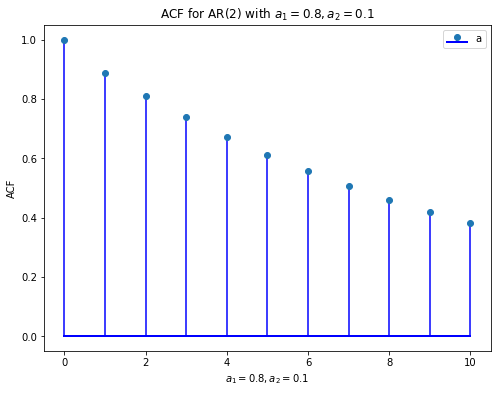

In [6]:
plt.figure(figsize=(8,6))

plt.title('ACF for AR(2) with $a_1=0.8,a_2=0.1$')
plt.xlabel('$a_1=0.8,a_2=0.1$')
plt.ylabel('ACF')
marker, stem, base = plt.stem(acf(0.8, 0.1, k=10), label='a')
plt.setp(stem, color='b')  # , linestyle=':'
plt.setp(base, color='b', linewidth=2)   
plt.legend(loc='best')

plt.show()

b) $a_1=1.0, a_2=-0.5$  

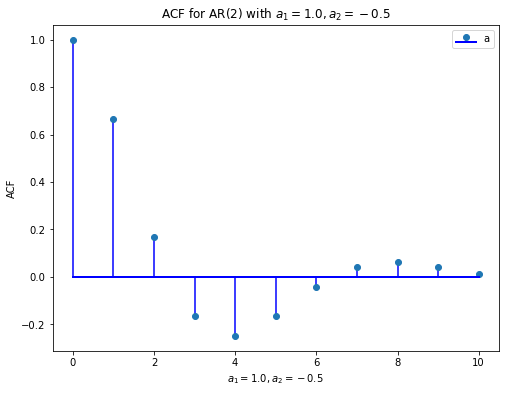

In [7]:
plt.figure(figsize=(8,6))

plt.title('ACF for AR(2) with $a_1=1.0,a_2=-0.5$')
plt.xlabel('$a_1=1.0,a_2=-0.5$')
plt.ylabel('ACF')
marker, stem, base = plt.stem(acf(1.0, -0.5, k=10), label='a')
plt.setp(stem, color='b')  # , linestyle=':'
plt.setp(base, color='b', linewidth=2)   
plt.legend(loc='best')

plt.show()

Describe qualitative difference between these two cases.

For a) there is a signifcant "tails off", which indicates a strong autocorrelation which is not stationary.  
For b) there is a significant "cuts off" instead after the 6th lag, whichs shows a relatively stationarity.

## Problem 3

Verify if the process $y_k=0.6y_{k-1}-0.08y_{k-2}+e_k$ has unit root. If it does, modify the coefficient $a_2$ so that it does not. If the process does not have unit root, modify $a_2$ so that it has unit root. Draw graphs of both processes with $y_0=y_1=1$ and $e_k$ uniformly distributed on the interval $[-0.5, 0.5]$.

The solution for characteristic function of AR(2) where $a_1 = 0.6, a_2 = -0.08$ is:  
$$
\begin{aligned}\\
\Phi(z)=1-0.6z + 0.08z^2 = 0\\
\end{aligned}
$$

Solutions are $z_1=5.0, z_2=2.5$, since neither of them $=1$, it does not have unit root

In order to let it has unit root by modifying $a_2$, let
$$
\begin{aligned}\\
z=\frac{0.6\pm\sqrt{(-0.6)^2-4(-a_2)}}{2(-a_2)} = 1\\
\end{aligned}
$$ 

<center>$\text{s.t.}$  $a_2 = 0.4$</center> 

then the process would be $y_k=0.6y_{k-1}+0.4y_{k-2}+e_k$ 

In [8]:
def ar_2(y0, y1, a_1, a_2, n)->list:
    """ AR(2) Process """
    y = [y0, y1]
    e = np.random.uniform(-0.5, 0.5, n)
    for i in range(2, n):
        y.append(a_1 * y[i - 1] + a_2 * y[i - 2] + e[i])
    return y

does not have unit root

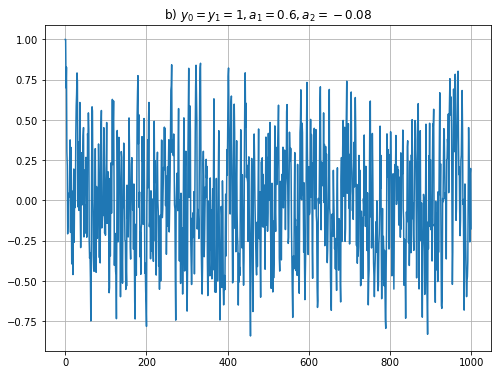

In [9]:
plt.figure(figsize=(8, 6))
plt.title('b) $y_0 = y_1 = 1, a_1 = 0.6, a_2 = -0.08$')
plt.plot(ar_2(1, 1, 0.6, -0.08, 1000))
plt.grid()
plt.show()

has unit root

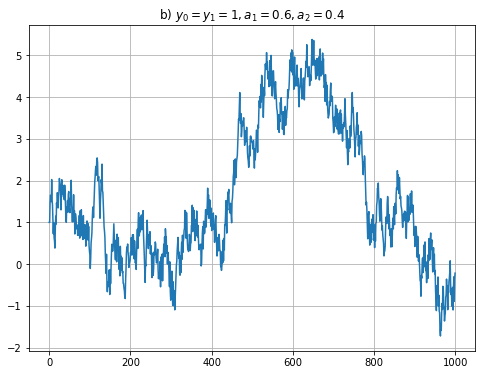

In [10]:
plt.figure(figsize=(8, 6))
plt.title('b) $y_0 = y_1 = 1, a_1 = 0.6, a_2 = 0.4$')
plt.plot(ar_2(1, 1, 0.6, 0.4, 1000))
plt.grid()
plt.show()

Apparently the one without unit root is stationary, whereas the one with unit root is not stationary since it has a significant trend.

## Problem 4

Impelment an algorithm for simulating the normal distribution. Repeat the exercise (1) with $e_k\sim N(0,0.5)$. Describe the difference between results with uniform and normal distributions.  

Box-Miller Method:  
If $U_1, U_2$ are independent random variables with uniform distribution on an interval $(0,1]$, then the following random variable has distribution $N(0,1)$:

$$
\begin{aligned}\\
Z_0=\sqrt{-2lnU_1}\cos(2\pi U_2) \\
\end{aligned}
$$

In [11]:
def ar_1_v2(y0, n, uniform=True)->list:
    """ AR(1) Process """
    y = [y0]
    
    if uniform:
        e = np.random.uniform(-0.5, 0.5, n)
    else:
        u_1 = np.random.uniform(0, 1, n)
        u_2 = np.random.uniform(0, 1, n)
        e = np.sqrt(-2*np.log(u_1))*np.cos(2*math.pi*u_2) * math.sqrt(0.5)
        
    for i in range(1, n):
        y.append(0.75 * y[i - 1] + e[i])
        
    return y

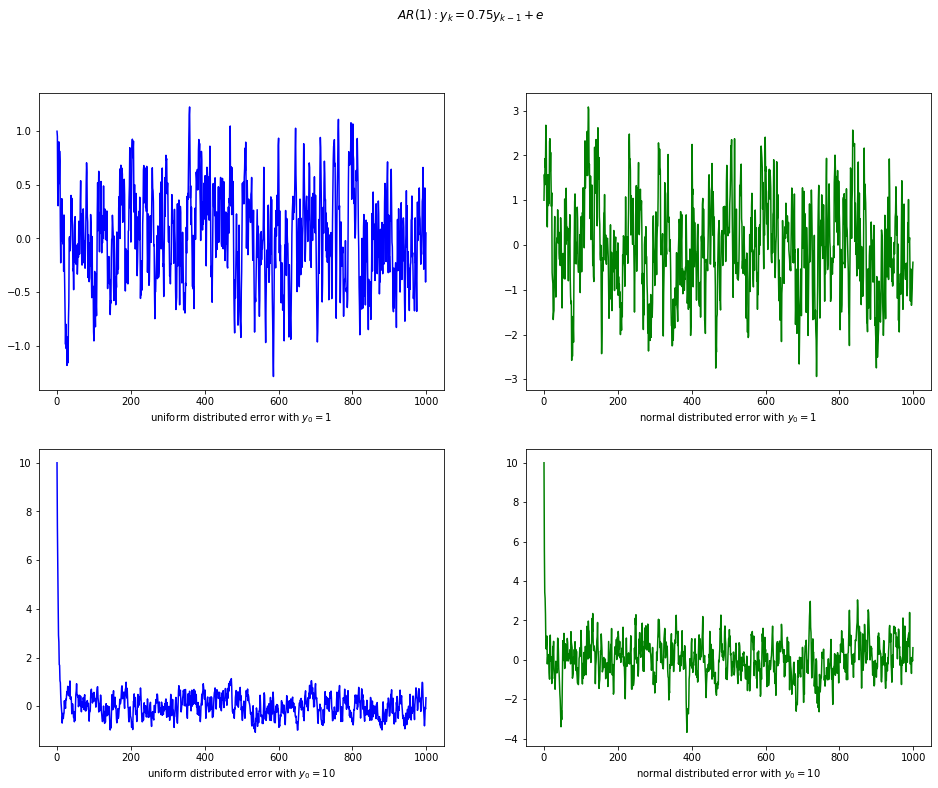

In [12]:
plt.figure(figsize=(16,12))
plt.suptitle('$AR(1): y_k=0.75y_{k-1}+e$')

plt.subplot(221)
plt.xlabel('uniform distributed error with $y_0 = 1$')
plt.plot(ar_1_v2(1, 1000, uniform=True), color = 'blue')

plt.subplot(222)
plt.xlabel('normal distributed error with $y_0 = 1$')
plt.plot(ar_1_v2(1, 1000, uniform=False), color = 'green')

plt.subplot(223)
plt.xlabel('uniform distributed error with $y_0 = 10$')
plt.plot(ar_1_v2(10, 1000, uniform=True), color = 'blue')

plt.subplot(224)
plt.xlabel('normal distributed error with $y_0 = 10$')
plt.plot(ar_1_v2(10, 1000, uniform=False), color = 'green')

plt.show()

Though they both of them have similar patterns, obviously, error term with a normal distribution is inclined to have a higher extreme values (larger range).